In [188]:
import dicom2nifti
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from nilearn.image import resample_img
import numpy as np
from preprocesamiento import transformGridImage
import glob
import os
from pathlib import Path

In [126]:
inputFolder = "/Users/hugom/Tesis/Imagenes/ADNI-MUESTRA-FULL-stripped"
outputFolder = "/Users/hugom/Tesis/Imagenes/ADNI-MUESTRA-FULL-resampled"

In [127]:
orig_nii = nib.load('ADNI-Full-PostProc/ADNI-10/016_S_4902/Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution/2012-09-27_10_35_01.0/I337880/ADNI_016_S_4902_PT_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution_Br_20121003095425916_82_S168893_I337880.nii')

In [128]:
orig_nii.shape

(160, 160, 96, 1)

In [129]:
orig_nii.header['pixdim']

array([1. , 1.5, 1.5, 1.5, 0. , 0. , 0. , 0. ], dtype=float32)

In [130]:
np.round(orig_nii.affine)

array([[  2.,   0.,   0., 160.],
       [  0.,   2.,   0., 160.],
       [  0.,   0.,   2.,   2.],
       [  0.,   0.,   0.,   1.]])

In [131]:
scale = 1/0.8
scaleAffine = np.array([
    [scale, 0, 0, 0],
     [0, scale, 0, 0],
    [0, 0, scale, 0],
   
    [0, 0, 0, 1],
])
newAffine =  orig_nii.affine @ scaleAffine
newAffine

array([[  1.875,   0.   ,   0.   , 160.   ],
       [  0.   ,   1.875,   0.   , 160.   ],
       [  0.   ,   0.   ,   1.875,   1.5  ],
       [  0.   ,   0.   ,   0.   ,   1.   ]])

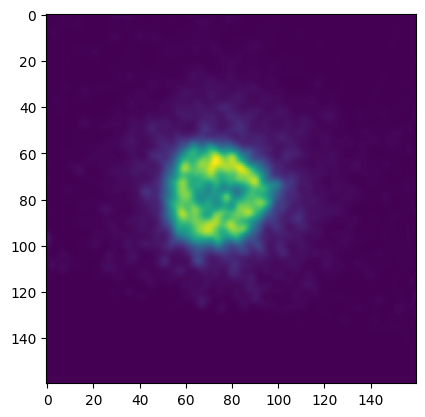

In [132]:
plt.imshow(orig_nii.dataobj[:,:,95])

In [133]:

#target_shape=(128, 128, 64), 
downsampled_nii = resample_img(orig_nii, copy = True, target_affine=newAffine, target_shape=(128, 128, 77), interpolation='nearest')

/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


In [134]:
downsampled_nii.shape

(128, 128, 77, 1)

In [135]:
orig_nii.header.get_zooms()

(1.5, 1.5, 1.5, 0.0)

In [136]:
downsampled_nii.header['pixdim']

array([1.   , 1.875, 1.875, 1.875, 1.   , 1.   , 1.   , 1.   ],
      dtype=float32)

In [137]:
downsampled_nii.affine

array([[  1.875,   0.   ,   0.   , 160.   ],
       [  0.   ,   1.875,   0.   , 160.   ],
       [  0.   ,   0.   ,   1.875,   1.5  ],
       [  0.   ,   0.   ,   0.   ,   1.   ]])

76


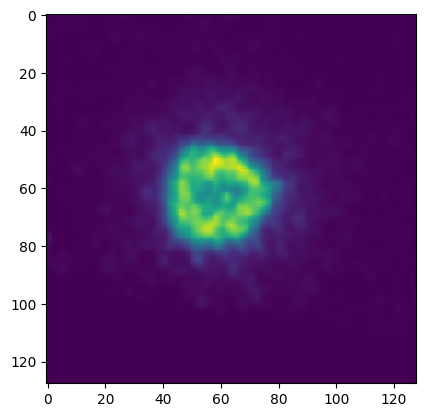

In [138]:
originalSlice = 95
slice = round(originalSlice*77/96)
print(slice)
plt.imshow(downsampled_nii.dataobj[:,:,slice])

In [139]:
downsampled_nii.header.get_zooms()

(1.875, 1.875, 1.875, 1.0)

In [140]:
cropped = nil.image.crop_img(downsampled_nii, copy = True, pad = False)

In [141]:
cropped.shape

(128, 128, 77, 1)

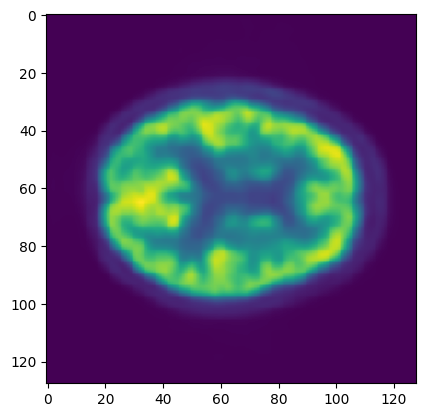

In [142]:
plt.imshow(cropped.dataobj[:,:,40])

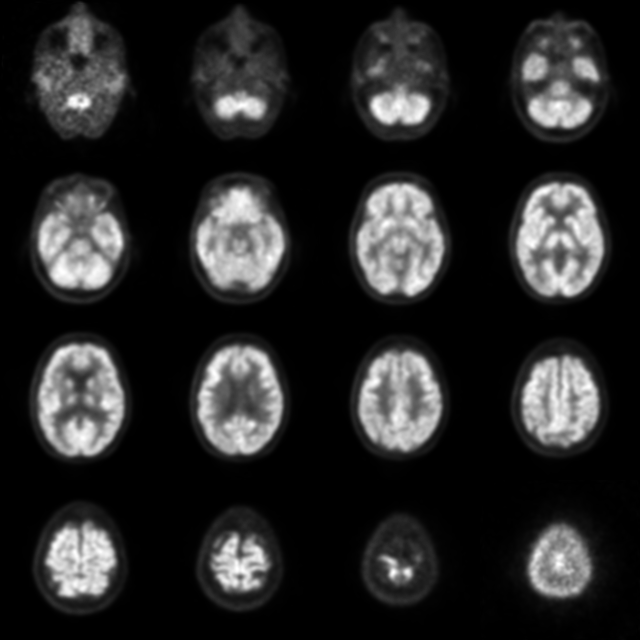

In [143]:
transformGridImage(orig_nii)

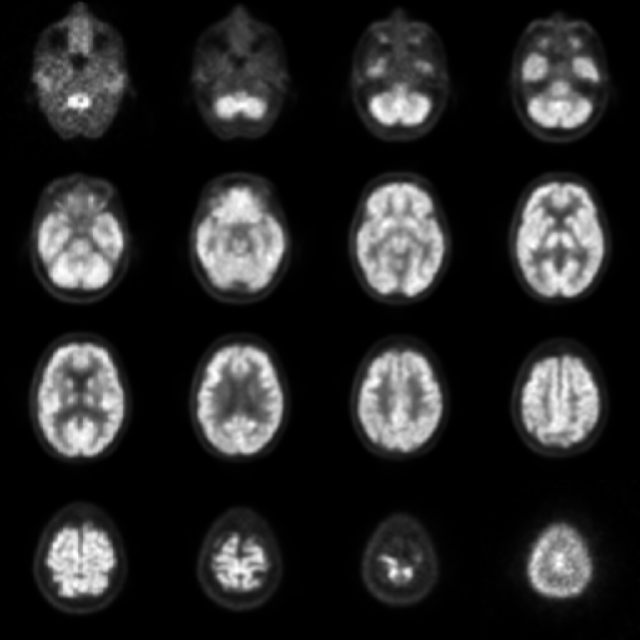

In [144]:
transformGridImage(downsampled_nii)

In [191]:
def resampleNifti(sample):
    newAffine =  sample.affine @ scaleAffine
    downsampled = resample_img(sample, copy = True, target_affine=newAffine, target_shape=(128, 128, 77), interpolation='continuous')
    return downsampled

In [177]:
def normalizeRange(sample):
    intensities = sample.get_fdata()
    mn, mx = intensities.min(), intensities.max()
    rescaled = (intensities - mn) / (mx - mn)

    new_img = nib.Nifti1Image(rescaled, sample.affine, sample.header)
    return new_img

In [178]:
pattern = inputFolder + "/**/*.nii" 
files = glob.glob(pattern, recursive = True)
len(files)

3817

In [193]:
i = 0
for file in files:
    resampled = resampleNifti(nib.load(file)) 
    newRange2 = normalizeRange(resampled)
    newPath = os.path.join(outputFolder, os.path.basename(file))
    nib.save(newRange2, newPath)
    print(str(i) + "/" + str(len(files)))
    i += 1

/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


0/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


1/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


2/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


3/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


4/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


5/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


6/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


7/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


8/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


9/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


10/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


11/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


12/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


13/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


14/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


15/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


16/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


17/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


18/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


19/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


20/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


21/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


22/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


23/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


24/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


25/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


26/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


27/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


28/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


29/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


30/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


31/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


32/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


33/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


34/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


35/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


36/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


37/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


38/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


39/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


40/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


41/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


42/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


43/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


44/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


45/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


46/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


47/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


48/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


49/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


50/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


51/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


52/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


53/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


54/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


55/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


56/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


57/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


58/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


59/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


60/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


61/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


62/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


63/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


64/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


65/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


66/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


67/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


68/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


69/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


70/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


71/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


72/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


73/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


74/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


75/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


76/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


77/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


78/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


79/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


80/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


81/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


82/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


83/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


84/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


85/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


86/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


87/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


88/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


89/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


90/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


91/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


92/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


93/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


94/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


95/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


96/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


97/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


98/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


99/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


100/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


101/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


102/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


103/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


104/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


105/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


106/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


107/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


108/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


109/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


110/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


111/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


112/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


113/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


114/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


115/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


116/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


117/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


118/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


119/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


120/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


121/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


122/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


123/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


124/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


125/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


126/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


127/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


128/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


129/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


130/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


131/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


132/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


133/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


134/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


135/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


136/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


137/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


138/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


139/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


140/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


141/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


142/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


143/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


144/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


145/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


146/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


147/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


148/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


149/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


150/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


151/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


152/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


153/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


154/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


155/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


156/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


157/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


158/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


159/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


160/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


161/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


162/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


163/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


164/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


165/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


166/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


167/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


168/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


169/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


170/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


171/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


172/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


173/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


174/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


175/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


176/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


177/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


178/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


179/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


180/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


181/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


182/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


183/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


184/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


185/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


186/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


187/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


188/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


189/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


190/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


191/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


192/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


193/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


194/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


195/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


196/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


197/3817


/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


KeyboardInterrupt: 

In [180]:
newRange = normalizeRange(nib.load(files[0]))

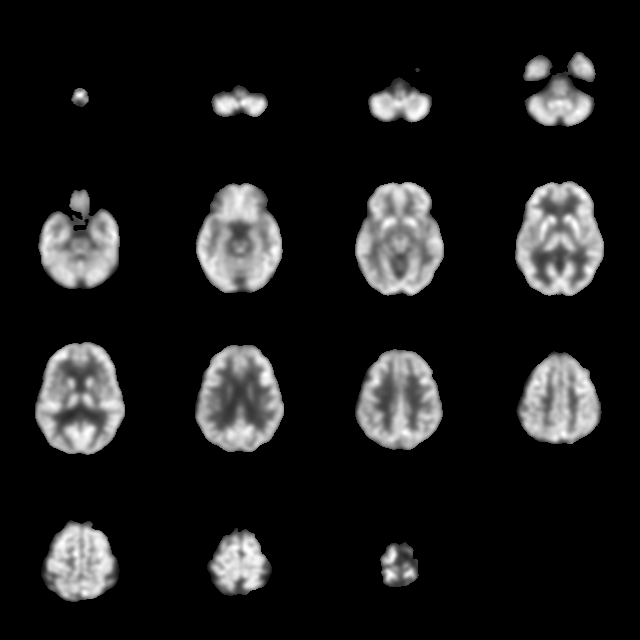

In [181]:
transformGridImage(newRange)

In [182]:
#for file in files:
resampled = resampleNifti(newRange) 

/Users/hugom/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


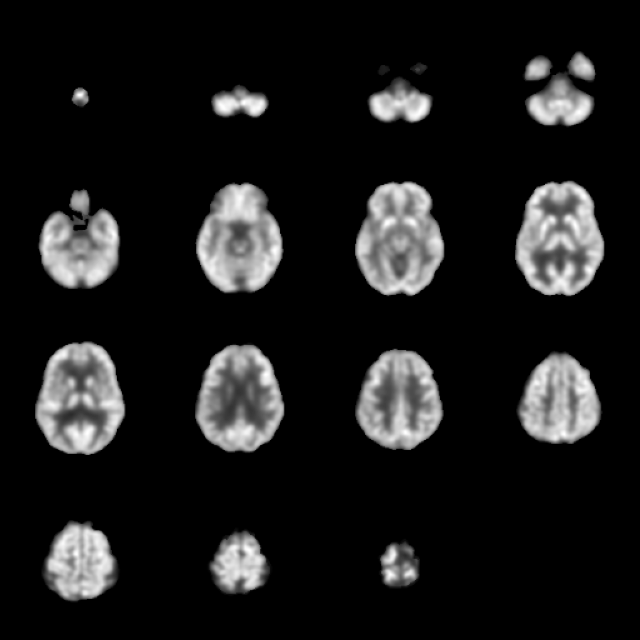

In [183]:
img = transformGridImage(resampled)
img

In [184]:
resampled.get_fdata().min(), resampled.get_fdata().max()

(0.0, 0.9902568802796141)

In [185]:
newRange2 = normalizeRange(resampled)

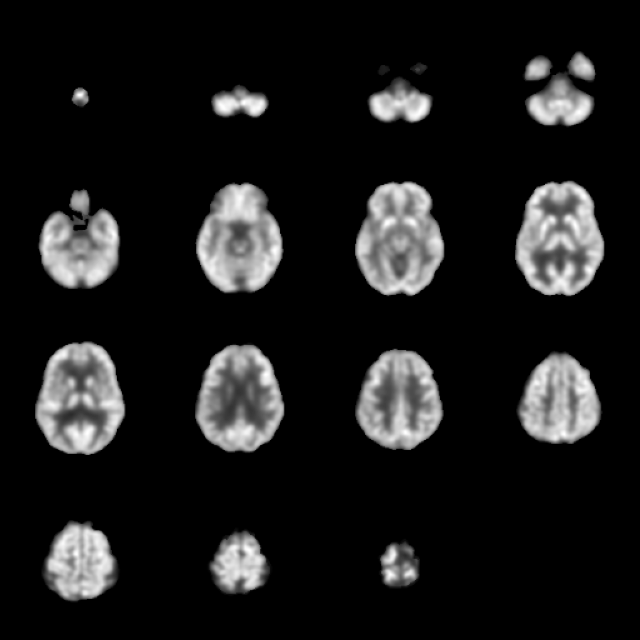

In [186]:
img = transformGridImage(newRange2)
img

In [160]:
newRange2.get_fdata().min(), newRange2.get_fdata().max()

(0.0, 1.0)